In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
plt.rcParams['text.usetex']=True
from sklearn import preprocessing 

In [2]:
f_min=2e-5
f_star=19.3e-3
phi_star=10
Tobs=3.0e7

def Sn_pos(f):
    return 4.84e-42

def Sn_acc(f):
    return 2.31e-40*(1e-3/f)**4


def S_A(f):
    return 4*Sn_pos(f)+8*(1+np.cos(f/f_star)**2)*(Sn_acc(f)/(2*np.pi*f)**4)

def rho(Tobs,f,A):
    return A/2*np.sqrt((Tobs*np.sin(f/f_star)/S_A(f)/f))

def P_snr(rho):
    return (3*rho)/((4*phi_star**2)*(1+(rho/(4*phi_star)))**5)

def P_A(x,f):
    D=2*np.sqrt((S_A(f)/(Tobs*np.sin(f/f_star)**2)))
    return ((1/D)*P_snr(x/D))

def P_A2(x,f):
    D=2*np.sqrt((S_A(f)/(Tobs*np.sin(f/f_star)**2)))
    return (3/D**2)*(x/(4*phi_star**2*(1+(x/(4*D*phi_star)))**5))

f0=0.001665
def logP_A(x):
    #x=10**x
    D=2*np.sqrt((S_A(f0)/(Tobs*np.sin(f0/f_star)**2)))
    return -np.log(D)+np.log(P_snr(x/D))
     
def logP_A_bis(x):
    D=2*np.sqrt((S_A(f0)/(Tobs*np.sin(f0/f_star)**2)))
    return np.log(3)-2*np.log(D)-4*np.log(4*phi_star**2)+np.log(x)-5*np.log(1+(x/(4*D*phi_star)))
    



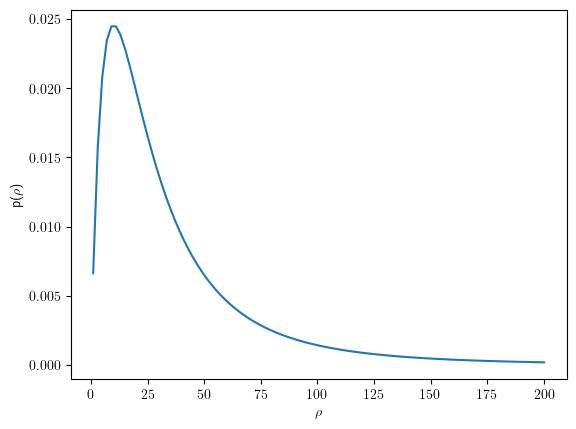

In [26]:
rho=np.linspace(1,200,100)
plt.plot(rho,(P_snr(rho)))
plt.xlabel(r'$\rho $')
plt.ylabel(r'p($\rho $)')
plt.savefig('/local/home/dd274198/Documents/Figures/Priors/UCB/snr.png')

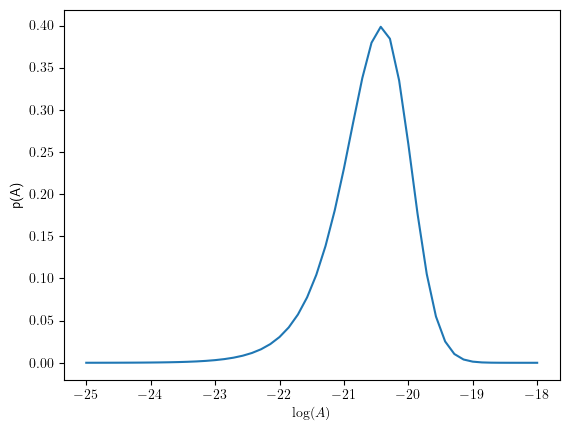

In [7]:
f=0.00774
tab_A=np.linspace(-25,-18,50)
ProbA_norm=preprocessing.normalize(np.array([P_A(10**tab_A,f)]))
plt.plot(tab_A,(ProbA_norm[0]))
#print(ProbA_norm)
#plt.plot(tab_A,(P_A2(10**tab_A,f)))
plt.xlabel(r'$\log(A)$')
plt.ylabel(r'p(A)')
plt.savefig('/local/home/dd274198/Documents/Figures/Priors/UCB/A.png')